# Python project
### The goal of this notebook is to simulate a business case in which a developer has to create a new app for the Android market, and wants to make sure they know the best possible conditions in order for it to be as highly rated as possible.
### To make sure of it, they are given a [Google Play Store apps dataset](https://www.kaggle.com/datasets/lava18/google-play-store-apps), from which they have to gather as many informations as possible.

## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
%matplotlib inline

In [2]:
#importing data and taking a look at the first values in it
data = pd.read_csv('googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Cleaning

In [3]:
#total rows and columns in the dataset
data.shape

(10841, 13)

In [4]:
#total number of items per column and their type
data.info()
#we can notice how only the "Rating" column is in the right format, whereas the rest are all classified as strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
#check the descriptive statistics of the dataset
data.describe(include='all') #we use include='all' to see all columns, otherwise we would only see the "Rating" column

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#check a sample of the data to view how the values in each column look like
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8359,Diseño de columnas NTC - RSEE 2017,PRODUCTIVITY,NaN,6,2.8M,100+,Paid,$0.99,Everyone,Productivity,"March 26, 2018",2.0,4.1 and up
448,Burner - Free Phone Number,COMMUNICATION,4.3,14873,Varies with device,"1,000,000+",Free,0,Everyone,Communication,"July 12, 2018",Varies with device,Varies with device
4102,Wish - Shopping Made Fun,SHOPPING,4.5,6200739,15M,"100,000,000+",Free,0,Everyone,Shopping,"August 3, 2018",4.20.5,4.1 and up
7048,bz Basellandschaftliche News,NEWS_AND_MAGAZINES,2.8,33,33M,"1,000+",Free,0,Everyone,News & Magazines,"June 6, 2018",1.4.0,5.0 and up
779,SAT Vocabulary,EDUCATION,4.2,642,Varies with device,"50,000+",Free,0,Everyone,Education,"June 5, 2018",Varies with device,Varies with device


## Cleaning Reviews column

In [7]:
#from the previous line, I immediately see that the "Reviews" column is numeric, so I check whether there are some anormal values which aren't numbers
data.Reviews.str.isnumeric().value_counts()

Reviews
True     10840
False        1
Name: count, dtype: int64

In [8]:
#there is just 1 non-numeric value. We can see it using this line - the ~ character is used to gather the "False" value in this command, otherwise
#it would return all True values
data[~data.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
#we can see this value is only missing the "Category" column, and all values are located 1 column to the left. It would be possible to correct it
#however since it's only one value, I will go ahead and drop it, then use the same line to see if all values in the Review column are now numeric
data=data.drop(data.index[10472])
data.Reviews.str.isnumeric().value_counts()

Reviews
True    10840
Name: count, dtype: int64

In [10]:
#since there are no more non-numeric values, we can now convert it to int64
data.Reviews=data.Reviews.astype(np.int64)

## Cleaning Size column

In [11]:
#let's now take a look at the Size column, we can check all its unique values using this line
data.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [12]:
#the column already has numeric values, but they include k (for KBs) and M (for MBs), and also a "Varies with device" value. We replace the Ms and Ks
#so they become numeric, and replace the "Varies with device" with the NaN value
data.Size=data.Size.str.replace('k','')
data.Size=data.Size.str.replace('M','000')
data.Size=data.Size.replace('Varies with device',np.nan)
#once the values are in the correct format, we can change the type of the column to float
data.Size=data.Size.astype(float)

In [13]:
#while we used the last cell to replace all the sizes to turn them into KBs, not all of them were replaced correctly, since some of them include a "."
#which is a decimal number - therefore, adding '000' to those won't make a difference. We can use a simple for loop to convert in KBs the values
#that weren't converted previously
for i in data.Size:
    if i < 10:
        data.Size=data.Size.replace(i,i*1000)

#now that they are all in KBs, we can convert them in MBs by dividing them

data.Size=data.Size/1000

In [14]:
#we can check if the values are now correct by calling a sample of the column
data.Size.sample(10)

3622    46.0
9365     3.9
9419    13.0
6582    25.0
9139    18.0
9284    19.0
3565     NaN
3589     6.5
323     10.0
9133    10.0
Name: Size, dtype: float64

## Cleaning Installs column

In [15]:
#the Installs column also has some characters that need to be replaced, we can check the unique values with this line
data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [16]:
#the values that need to be replaced are "+" and ","
data.Installs=data.Installs.str.replace('+','')
data.Installs=data.Installs.str.replace(',','')

In [17]:
#once they are cancelled, we can convert the column to int64
data.Installs=data.Installs.astype(np.int64)
data.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

## Cleaning Price and Last Updated columns

In [18]:
#we use the same process as the Installs column for the Price column
data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [19]:
#the symbol that needs to be replaced here is "$", then it can be converted to float type
data.Price=data.Price.str.replace('$','')
data.Price=data.Price.astype(float)

In [20]:
#lastly, we check what the Last Updated column looks like
data['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10840, dtype: object

In [21]:
#its type is object, but it can easily be corrected with the pandas to_datetime function
data['Last Updated']=pd.to_datetime(data['Last Updated'])

In [22]:
#we can check whether all the data is in the correct type
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.2+ MB


In [23]:
#looks like it is, so we can now use the describe method again properly:
data.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000,10840
mean,4.191757,4.441529e+05,21.506534,1.546434e+07,1.027368,2017-11-21 06:43:02.435424256
min,1.000000,0.000000e+00,0.010000,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000,2017-09-20 00:00:00
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000,2018-05-24 00:00:00
75%,4.500000,5.477550e+04,30.000000,5.000000e+06,0.000000,2018-07-20 00:00:00
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.515219,2.927761e+06,22.596021,8.502936e+07,15.949703,NaN


## Cleaning Genres column

In [24]:
#from the sample we generated before, I also noticed the Genres column may contain some redundant values
data.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [25]:
#looks like there's a lot of unique values in this column, so we can check their count with the value_counts() function
data.Genres.value_counts()

Genres
Tools                                842
Entertainment                        623
Education                            549
Medical                              463
Business                             460
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: count, Length: 119, dtype: int64

In [26]:
#since many genres have multiple occurences with a niece attached, I will delete the niece and group them by generic Genre instead
data.Genres = data.Genres.str.split(';').str[0]
data.Genres.unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [27]:
#we can now check the value_counts() again
data.Genres.value_counts()

Genres
Tools                      843
Entertainment              667
Education                  645
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            392
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Books & Reference          234
Dating                     234
Simulation                 218
Video Players & Editors    178
Puzzle                     167
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   111
Adventure                   91
H

In [28]:
#We can group Music & Audio as Music
data.Genres.replace('Music & Audio', 'Music', inplace = True)
data.Genres.unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Video Players & Editors', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel & Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'News & Magazines',
       'Maps & Navigation', 'Casino'], dtype=object)

## Dropping duplicates and useless columns

In [29]:
#let's check whether there are duplicates in the dataset
data.duplicated().sum()

483

In [30]:
#it's a very small number so we can just delete them 
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [31]:
#we can also delete the last 2 columns since they are not relevant for our analysis
data.drop(columns=['Current Ver','Android Ver'], inplace=True)

# EDA

## Rating

<Axes: xlabel='Rating', ylabel='Count'>

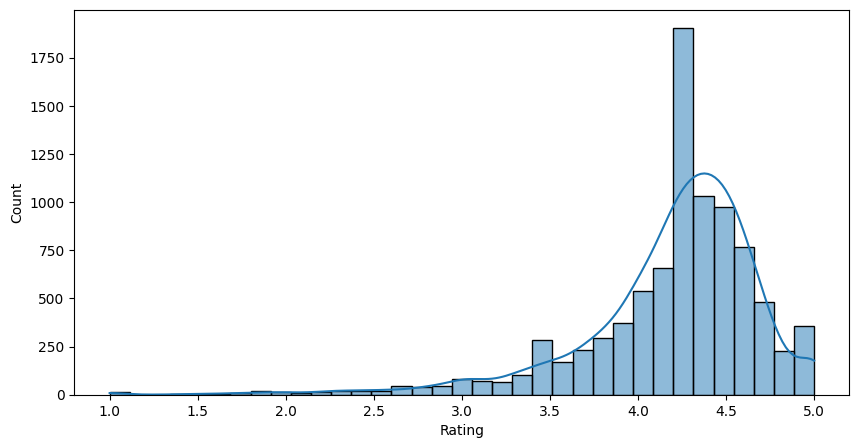

In [32]:
#as the first step of the analysis, since the main objective is to develop a high-rated app, we check the count and distribution of the Rating column
fig, ax = plt.subplots(figsize=(10,5)) #we generate the figure
sns.histplot(data.Rating, bins=35, kde=True) #we generate the plot

The majority of the apps have a rating around 4.0.

## Price

<Axes: ylabel='count'>

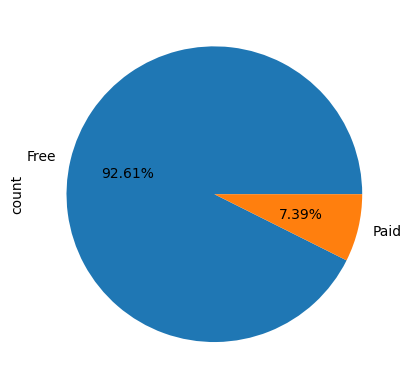

In [33]:
#we can now check the percentages of free apps compared to paid ones with a pie chart
data.Type.value_counts().plot.pie(y='Type',autopct='%.2f%%')

Clearly, most of the apps are free.
Let's take a better look at paid apps:

<Axes: xlabel='Price'>

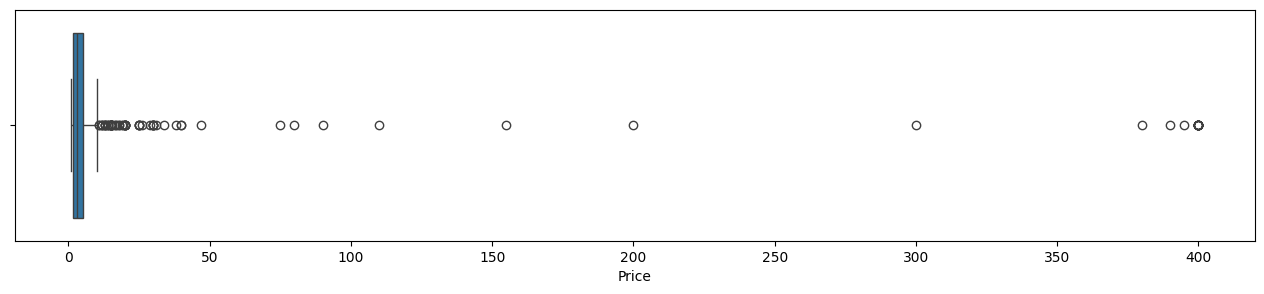

In [34]:
#to look at the paid apps, we check their distribution with a box plot
fix,ax=plt.subplots(figsize=(16,3))
sns.boxplot(x='Price', data=(data[data.Price>0]))

We can see that this distribution is heavily skewed on the right as there are outliers that cost over 50 USD.

In [35]:
data[data.Price>=50]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32.000,1000,Paid,79.99,Everyone,Medical,2018-06-18
2390,Language Therapy: Aphasia,MEDICAL,NaN,10,28.000,1000,Paid,74.99,Everyone,Medical,2018-06-25
4197,most expensive app (H),FAMILY,4.3,6,1.500,100,Paid,399.99,Everyone,Entertainment,2018-07-16
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03
5351,I am rich,LIFESTYLE,3.8,3547,1.800,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12
5354,I am Rich Plus,FAMILY,4.0,856,8.700,10000,Paid,399.99,Everyone,Entertainment,2018-05-19
5355,I am rich VIP,LIFESTYLE,3.8,411,2.600,10000,Paid,299.99,Everyone,Lifestyle,2018-07-21
5356,I Am Rich Premium,FINANCE,4.1,1867,4.700,50000,Paid,399.99,Everyone,Finance,2017-11-12
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.900,1000,Paid,379.99,Everyone,Lifestyle,2018-07-01


In [36]:
len(data[data.Price>=50])

23

Of these 23 apps, it seems most of them are "I am rich" apps that don't do anything at all. Since they don't provide any valuable insight for our analysis, we can just delete them from the dataset.

In [37]:
data = data[data.Price<50]

Text(0.5, 0, 'Price(USD)')

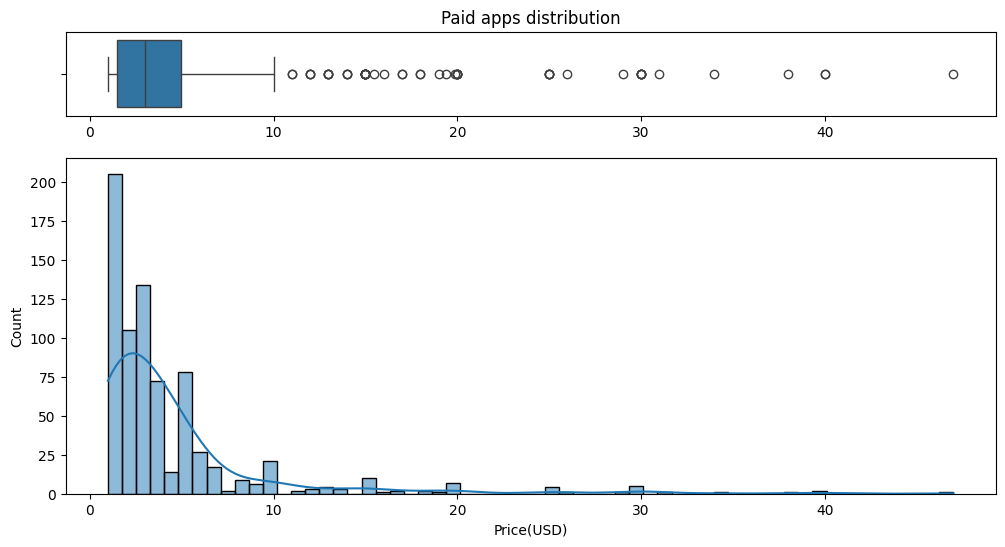

In [38]:
#we can now see a box plot and a histogram with the price distribution of the apps in the store
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6), gridspec_kw={'height_ratios': (2,8)})
#we generate the figure with 2 rows, and a 2:8 ratio between them
sns.boxplot(x='Price', data=data.loc[data['Price'] > 0], ax=ax[0]) #the box plot goes on the first axis (first row)
ax[0].set_title('Paid apps distribution') #we set a title for the entire figure
ax[0].set_xlabel('') #and remove the label for the box plot
sns.histplot(x='Price', data=data.loc[data['Price'] > 0], ax=ax[1], kde=True) #the histogram goes on the second axis
ax[1].set_xlabel('Price(USD)') #to be more clear, we specify that the price is in USD by setting the label for the x axis

The distribution is still highly skewed on the right, but now we can see the interquartile range and median properly.\
We can now check if paid apps tend to have a higher or lower rating compared to free apps.

Text(0.5, 0, 'Price(USD)')

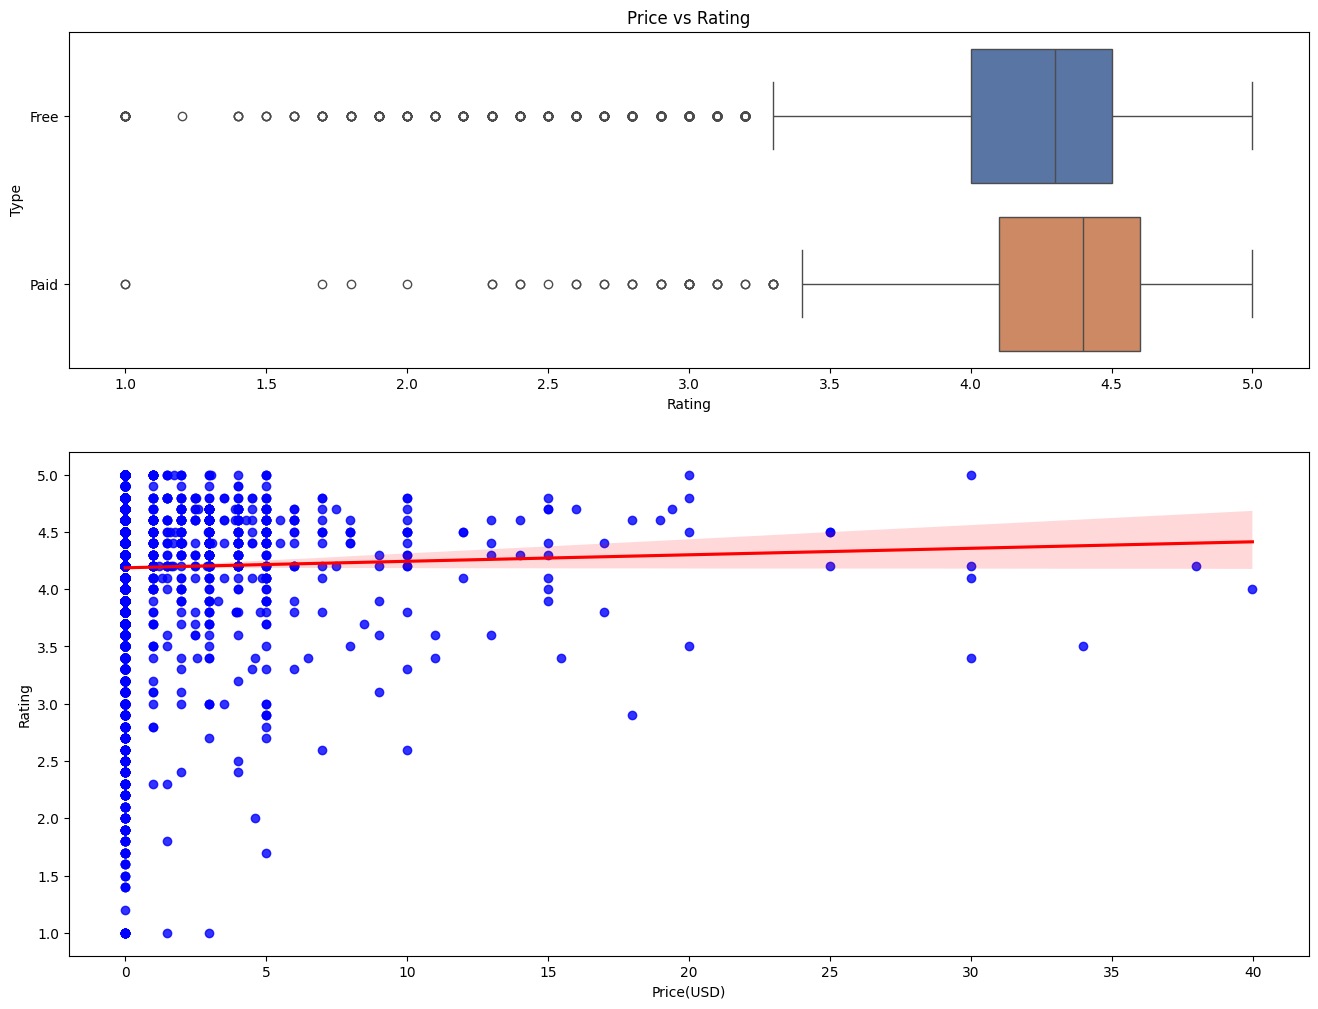

In [39]:
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(16,12), gridspec_kw={'height_ratios': (4,6)}) #generate a figure with 2 rows and 4:6 ratio
ax[0].set_title('Price vs Rating')
sns.boxplot(x='Rating', y='Type',  data=data, ax=ax[0], vert=False, palette='deep', hue='Type', legend=False) 
#the box plot compares rating distribution between free and paid apps
sns.regplot(x='Price', y='Rating', data=data, ax=ax[1], scatter_kws = {"color": "blue"}, line_kws = {"color": "red"}) 
#the regression plot is used to check if there is a relation between paid apps' price and rating
ax[1].set_xlabel('Price(USD)')

From these two graphs we can see that the Rating distribution for Paid apps is slightly more skewed on the right compared to free apps, and that there is a slightly positive trend between Price and Rating: apps with a higher price tend to have a moderately higher rating than less expensive ones.

## Category

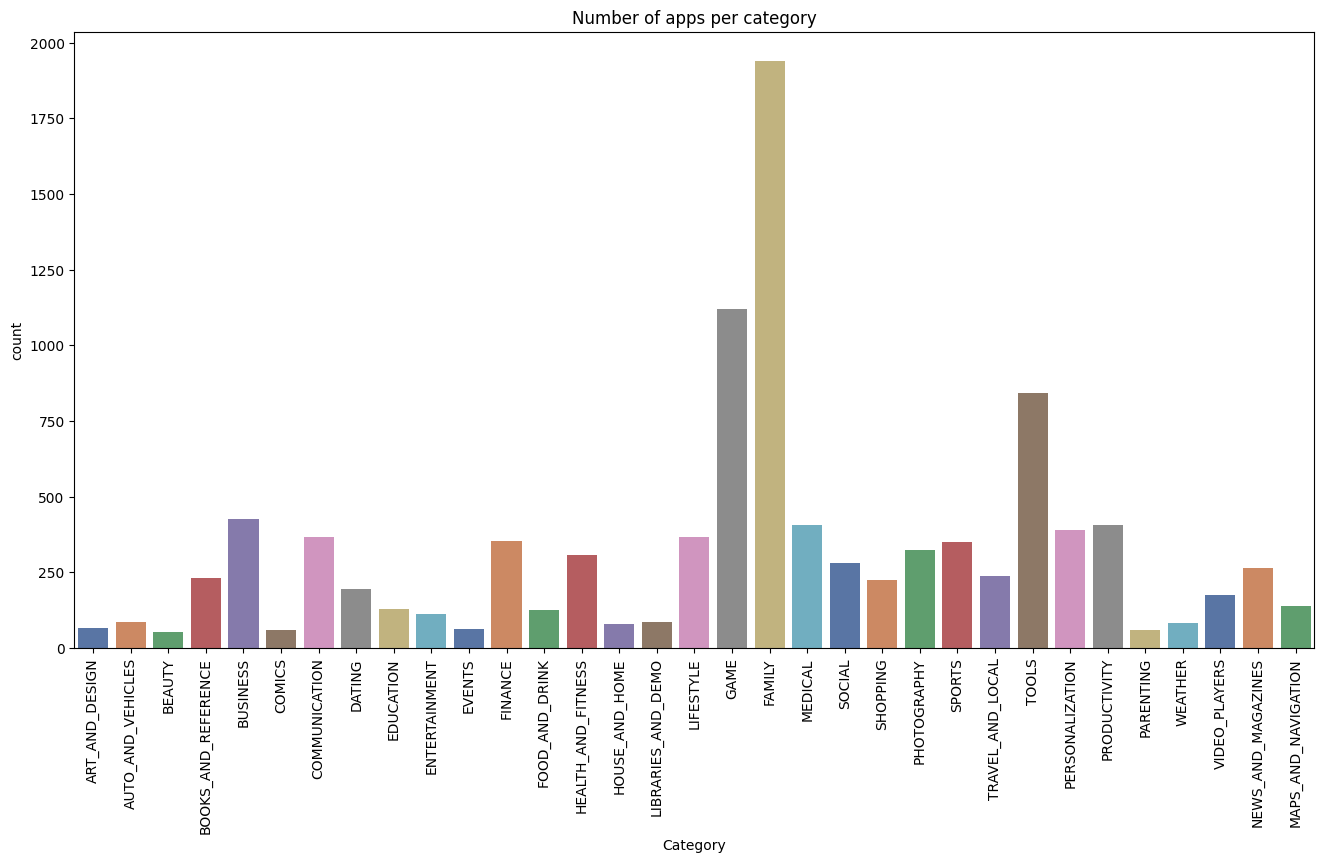

In [40]:
#we can now check the count of apps per each category
fix, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='Category', data=data, palette='deep', hue='Category', legend=False)
ax.set_title('Number of apps per category')
plt.xticks(rotation=90); #rotate the x-ticks so they don't overlap

The most popular categories are Family, Game, and Tools.\
We can check if there is a relationship between the Category and Rating columns with a box plot.

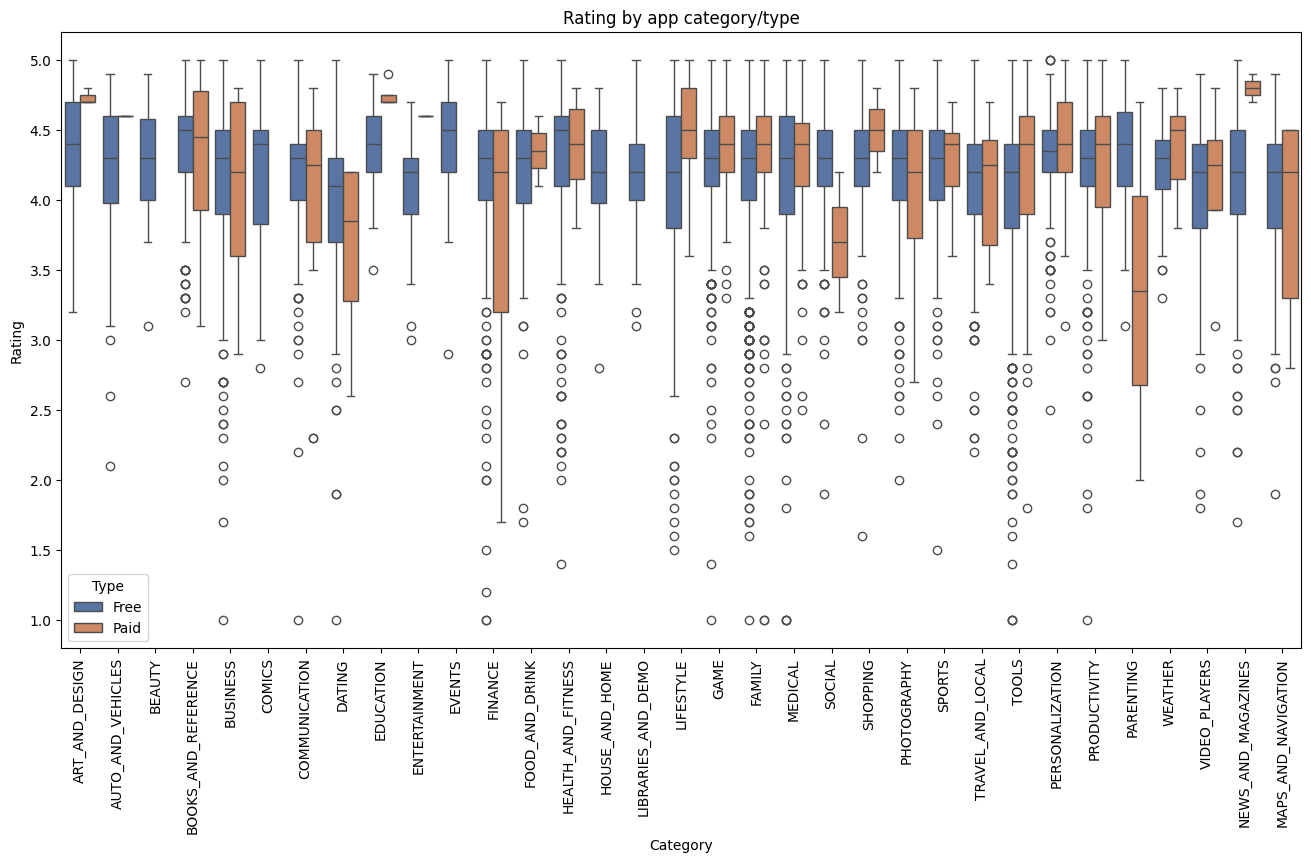

In [41]:
fig,ax = plt.subplots(figsize=(16,8))
sns.boxplot(x='Category', y='Rating', data=data, palette='deep', hue='Type')
ax.set_title('Rating by app category/type')
plt.xticks(rotation=90);  

It seems Category and Rating don't have a high correlation - nearly all categories have around the same median rating. However, we can note again that paid apps tend to have a higher rating compared to free apps, and tend to have a lower number of outliers compared to free apps.

## Size

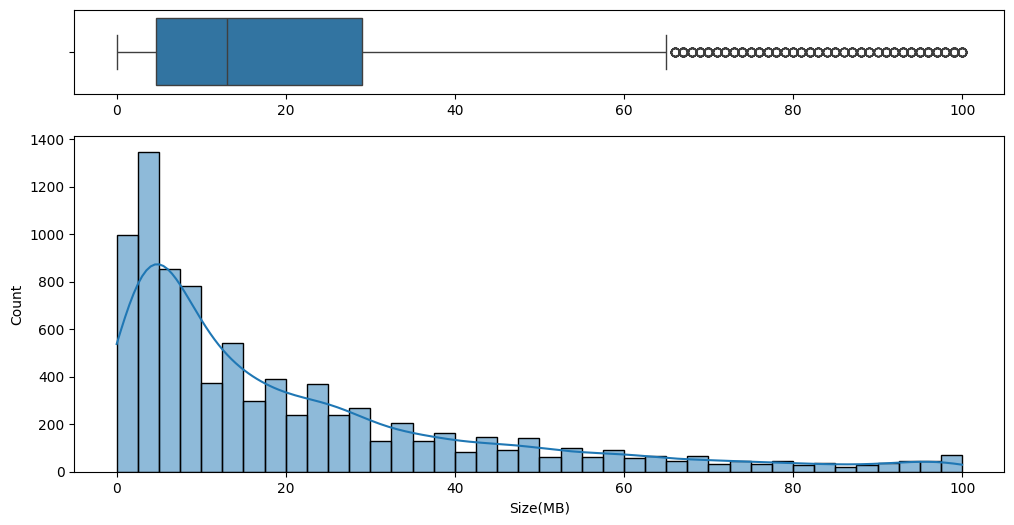

In [42]:
#for size, we can check the distribution again with a box plot and histogram, using a similar function as the one used for price
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6), gridspec_kw={'height_ratios': (2,8)})
sns.boxplot(x='Size', data=data, ax=ax[0])
ax[0].set_xlabel('')
sns.histplot(x='Size', data=data, ax=ax[1], bins=40, kde=True)
ax[1].set_xlabel('Size(MB)'); #set the name to clarify the sizes are in MBs

The distribution looks highly skewed on the right.

In [43]:
data[data.Size > 60].value_counts('App').sum()

704

Most apps have a size around 5-10 MBs. There are also many outliers (more than 700) whose size is higher than 60 MBs.\
\
We can check if there is a relationship between size and rating with a regression plot.

Text(0.5, 0, 'Size(MB)')

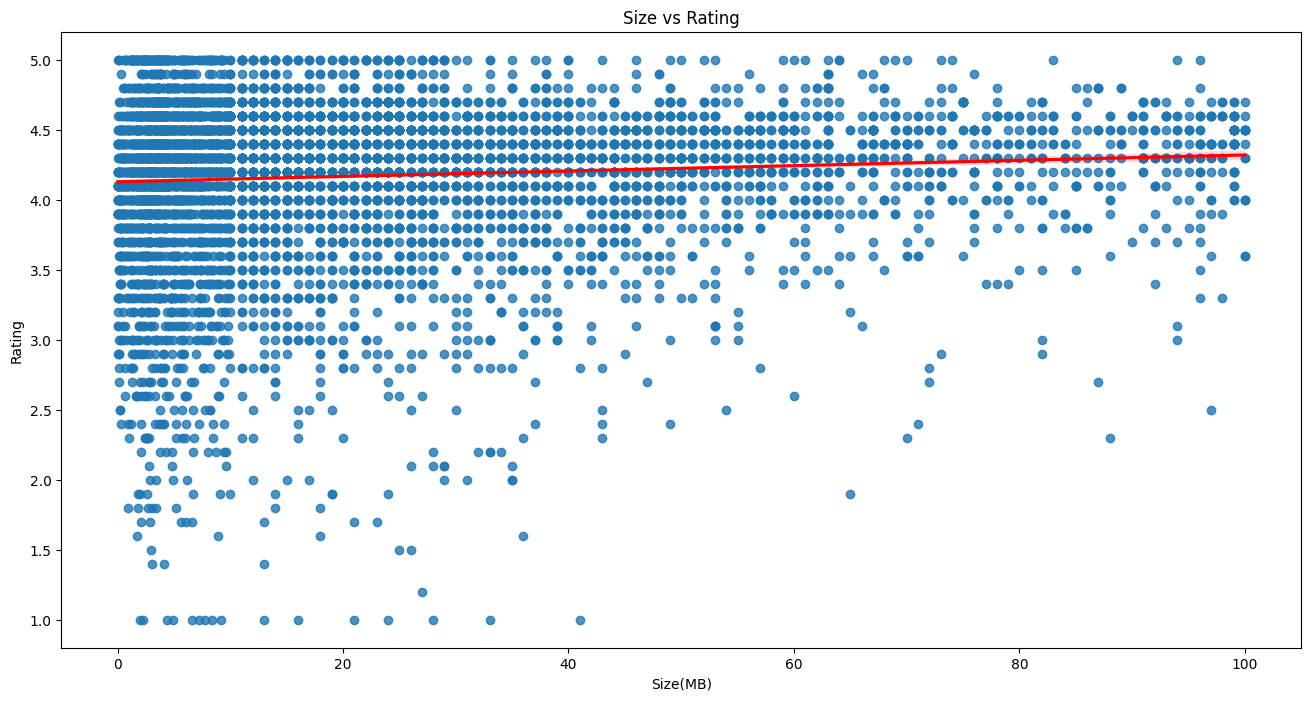

In [44]:
fig,ax = plt.subplots(figsize=(16,8))
sns.regplot(x='Size', y='Rating', data=data, line_kws = {"color": "red"})
ax.set_title('Size vs Rating')
ax.set_xlabel('Size(MB)')

It seems Size and Rating aren't too heavily correlated, however we can still note a positive trend - apps which are bigger in size tend to have higher ratings compared to smaller apps.

## Reviews and Installs

<Axes: xlabel='Reviews', ylabel='Density'>

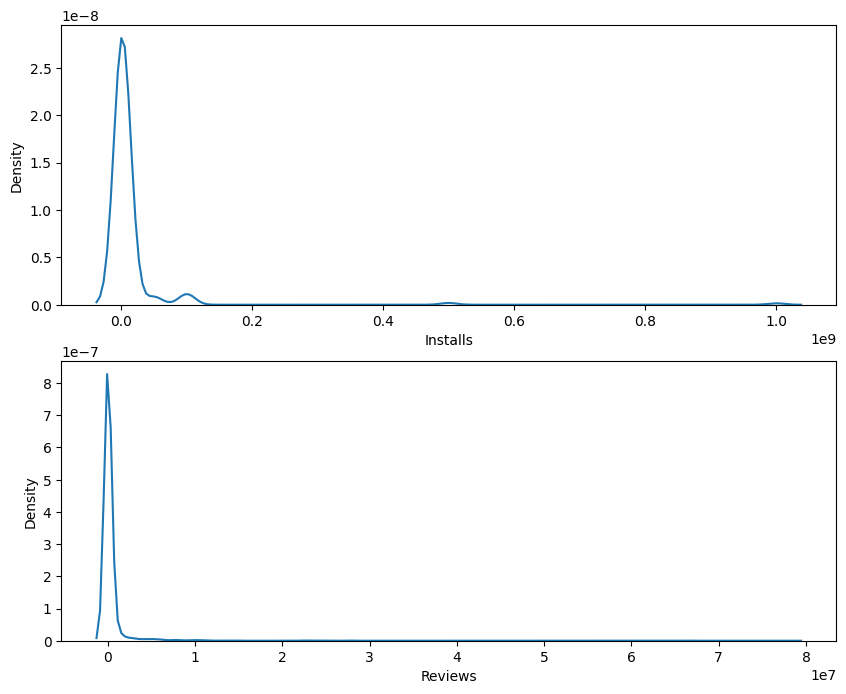

In [45]:
#it is highly likely that these two columns are highly correlated, therefore they will be analyzed together
#we start by creating a 2-row plot with their density plot
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8))
sns.kdeplot(x='Installs', data=data, ax=ax[0])
sns.kdeplot(x='Reviews', data=data, ax=ax[1])

We can clearly see that most apps much less than 1 Million installs/reviews. Let's try and cut the most popular apps by reducing the dataframe a bit.

<Axes: xlabel='Reviews', ylabel='Density'>

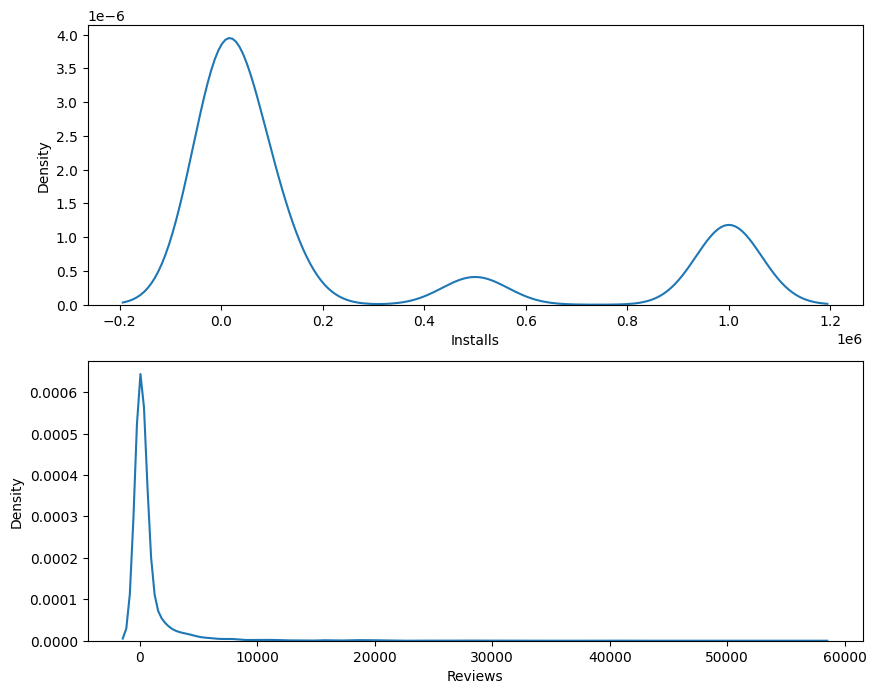

In [46]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8))
sns.kdeplot(x='Installs', data=data.loc[data['Installs'] <= 1000000], ax=ax[0])
sns.kdeplot(x='Reviews', data=data.loc[data['Installs'] <= 100000], ax=ax[1])

The distribution is pretty similar even if we don't take into account the very popular apps.\
We can now check how these variables are related with a regression plot.

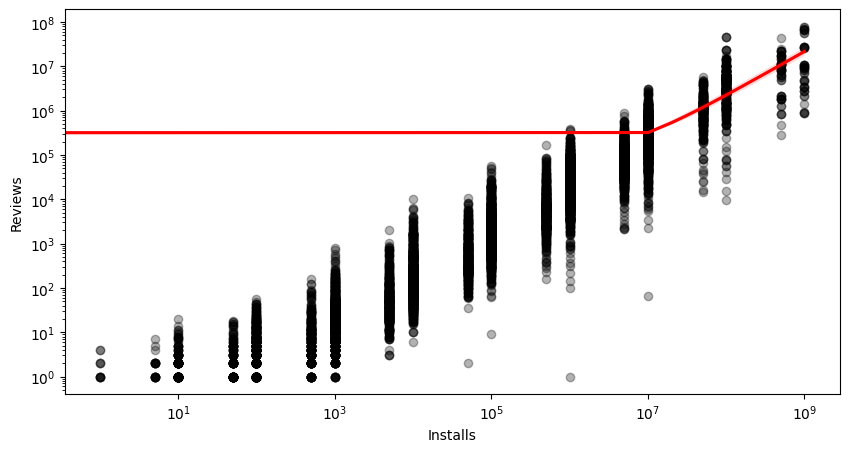

In [47]:
fig,ax = plt.subplots(figsize=(10,5))
sns.regplot(x='Installs',y='Reviews', data=data, scatter_kws = {"color": "black", "alpha":0.3}, line_kws = {"color": "red"})
plt.yscale('log')
plt.xscale('log') #due to the high numbers present in these columns, we use a logarithmic scale to visualize them better

As expected, these two variables are highly correlated - apps with a high number of installs will also have a high number of reviews.\
But what is their rating? We can check it by using another regression plot.

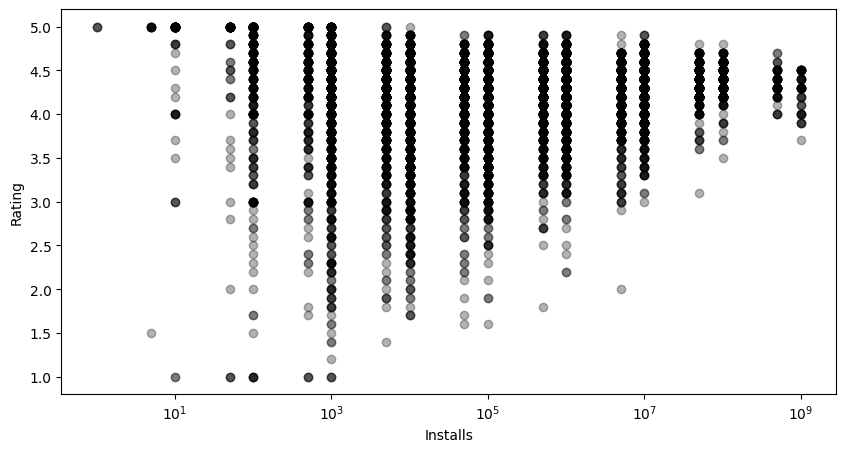

In [48]:
fig,ax = plt.subplots(figsize=(10,5))
sns.regplot(x='Installs',y='Rating', data=data, fit_reg=False, scatter_kws = {"color": "black", "alpha": 0.3})
plt.xscale('log')

From this regression plot, we can clearly see that **the most popular apps are more likely to have a higher rating.**

In [49]:
#what are the most popular apps in the store?
data[data.Installs >= 1000000000].sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03
2554,Google+,SOCIAL,4.2,4831125,NaN,1000000000,Free,0.0,Teen,Social,2018-07-26
865,Google Play Games,ENTERTAINMENT,4.3,7165362,NaN,1000000000,Free,0.0,Teen,Entertainment,2018-07-16
3928,YouTube,VIDEO_PLAYERS,4.3,25623548,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-02
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-06


## Genres

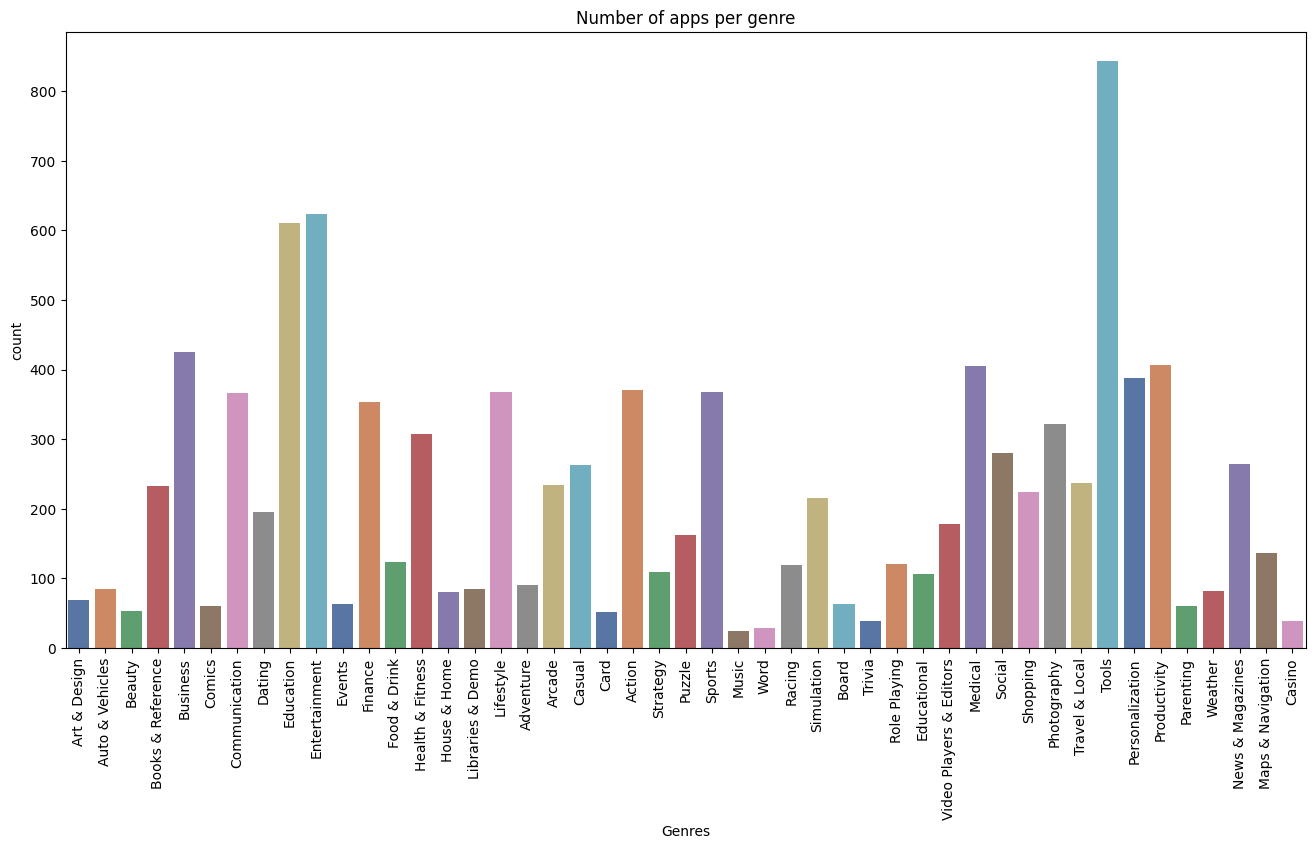

In [50]:
#we will now look at the amount of apps per Genre, using a similar countplot as the one used for the Categories column
fix, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='Genres', data=data, palette='deep', hue='Genres', legend=False)
ax.set_title('Number of apps per genre')
plt.xticks(rotation=90);

The most popular Genres seem to be Tools, Education, and Entertainment. We can check if there is a correlation between Genre and Rating, as we did for Category.

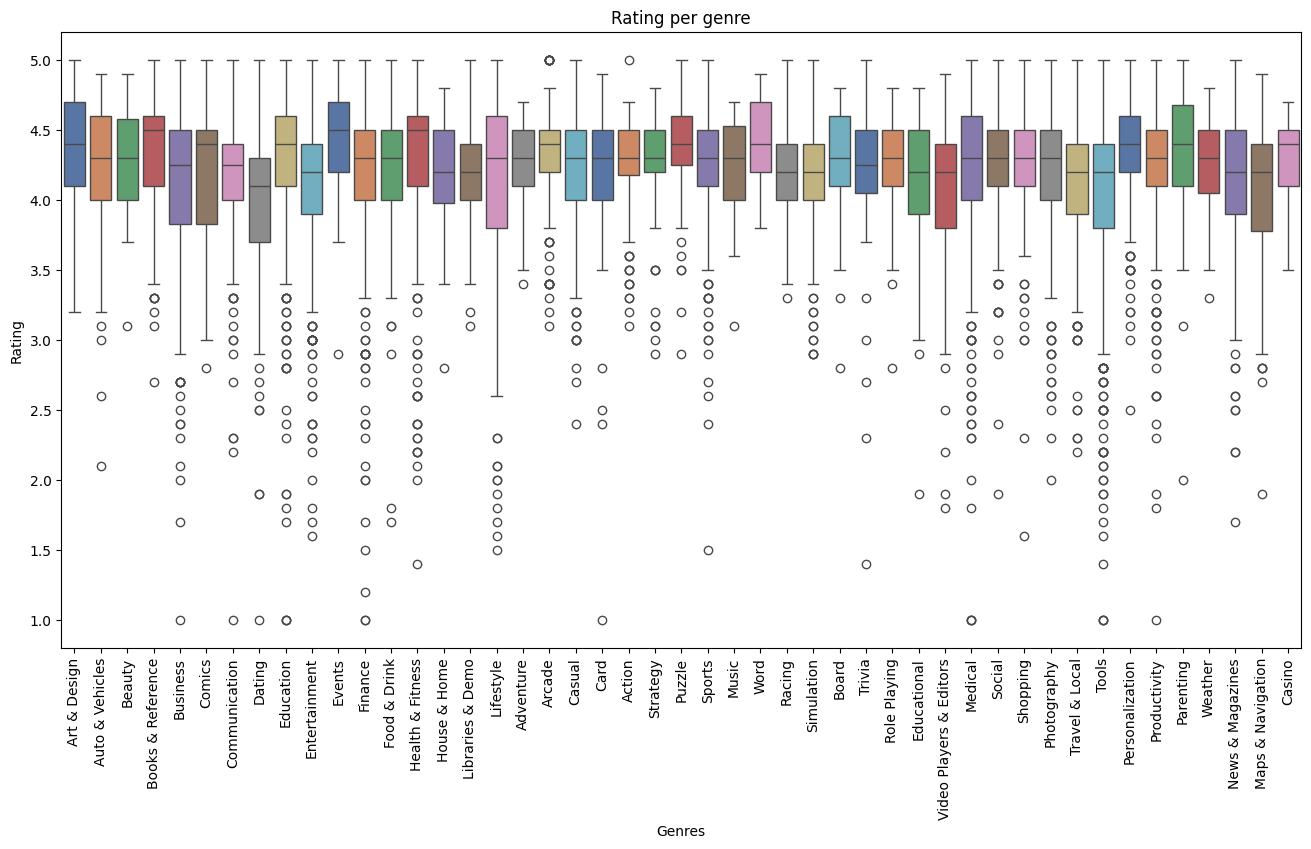

In [51]:
fix, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x='Genres', y='Rating', data=data, palette='deep', hue='Genres', legend=False)
ax.set_title('Rating per genre')
plt.xticks(rotation=90);

Similar to category, there isn't much relation between Genre and Rating.

## Last Updated

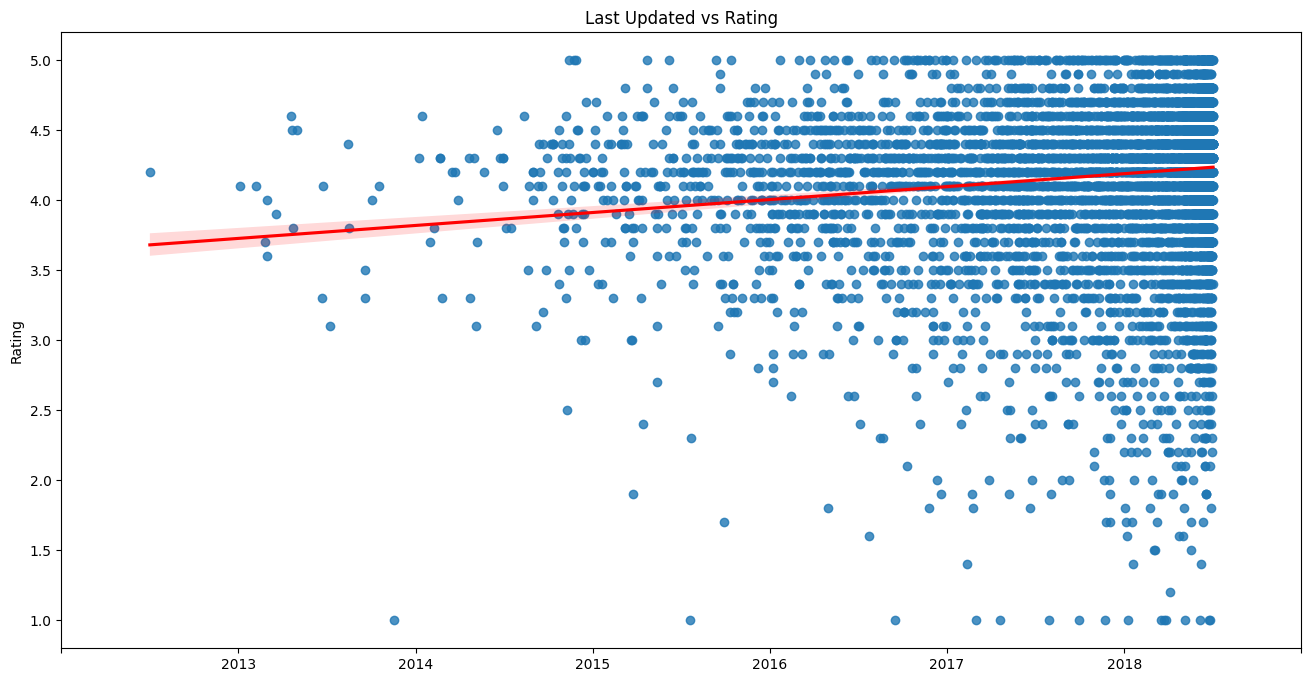

In [52]:
#we will check if there is a relation between the Last Updated date and Rating
fig,ax = plt.subplots(figsize=(16,8))
sns.regplot(x=(dates.date2num(data['Last Updated'])), y='Rating',data=data,line_kws = {"color": "red"})
#since the datetime type doesn't work with a regression plot, we use the matplotlib.dates add-on, which represents dates as float numbers
ax.set_title('Last Updated vs Rating')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(['','2013','2014','2015','2016','2017','2018','']);
#we then correct the x labels by putting in the correct year instead of dates' float number
#note: the first x tick is located at (0,0) in this graph, and the last one is located at the end of the graph on the right, where year 2019 would be

Note: the data in this dataset is up to 2018.\
We can clearly see that applications that are being kept more up to date tend to have a higher rating.

## Content Rating

<Axes: ylabel='count'>

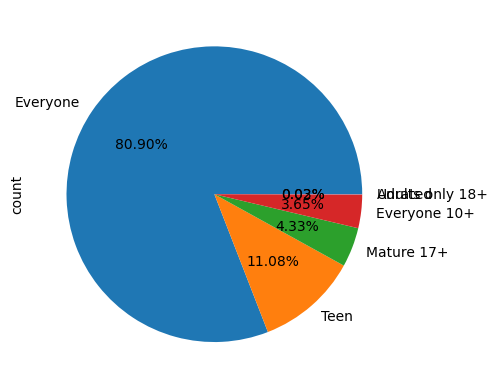

In [53]:
#lastly, we will check how the Content Rating column is divided
data['Content Rating'].value_counts().plot.pie(y='Content Rating',autopct='%.2f%%')

<Axes: xlabel='Content Rating', ylabel='Rating'>

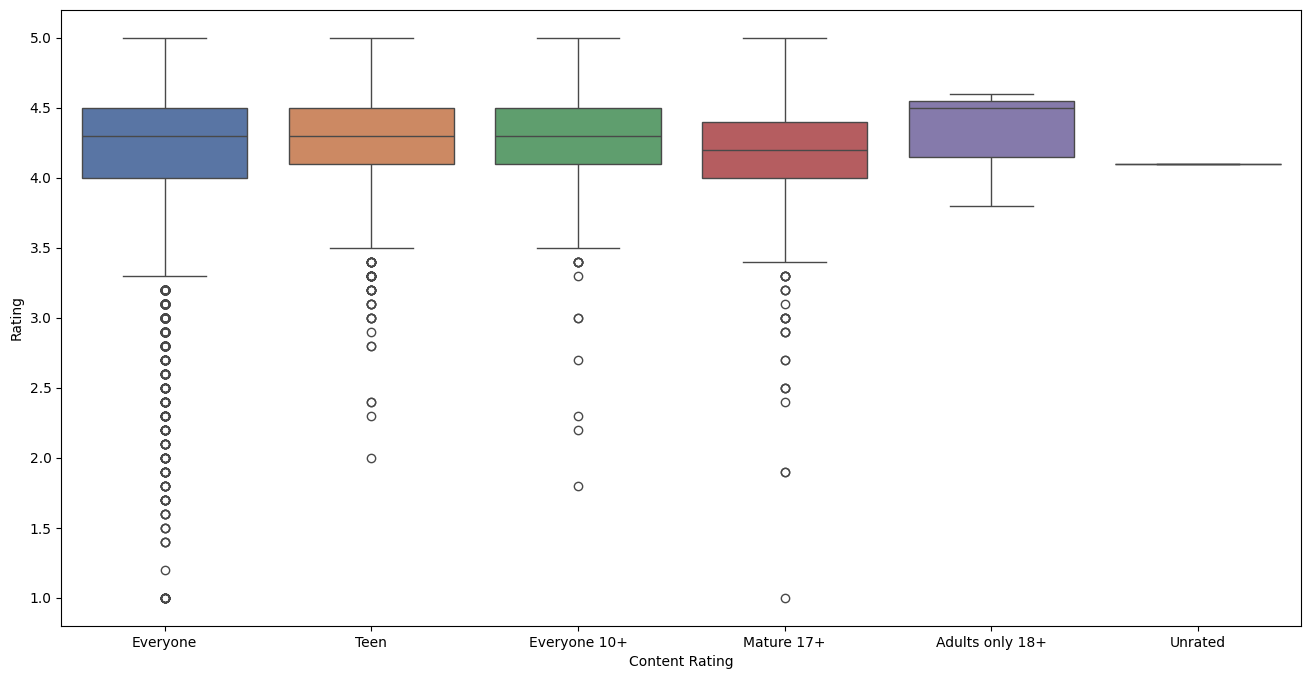

In [54]:
#let's verify if there is any relation between the Content Rating of the app and its Rating
fig,ax = plt.subplots(figsize=(16,8))
sns.boxplot(x='Content Rating', y='Rating', data=data, palette='deep', hue='Content Rating', legend=False)

It seems Content Rating doesn't affect app Rating too much, although most apps are rated for 'Everyone'

# Conclusion

### In the EDA, we saw how most of the variables at hand don't really affect the Rating by themselves. Instead, the Rating is mostly affected by the number of installations of the app itself - the more people download the app, the more it is reviewed and updated, and most likely it is that it stays well developed and highly rated on the store. \
### With this in mind, we can check what variables are most correlated with the Installs and Reviews columns, to see what type of apps are downloaded most by users.

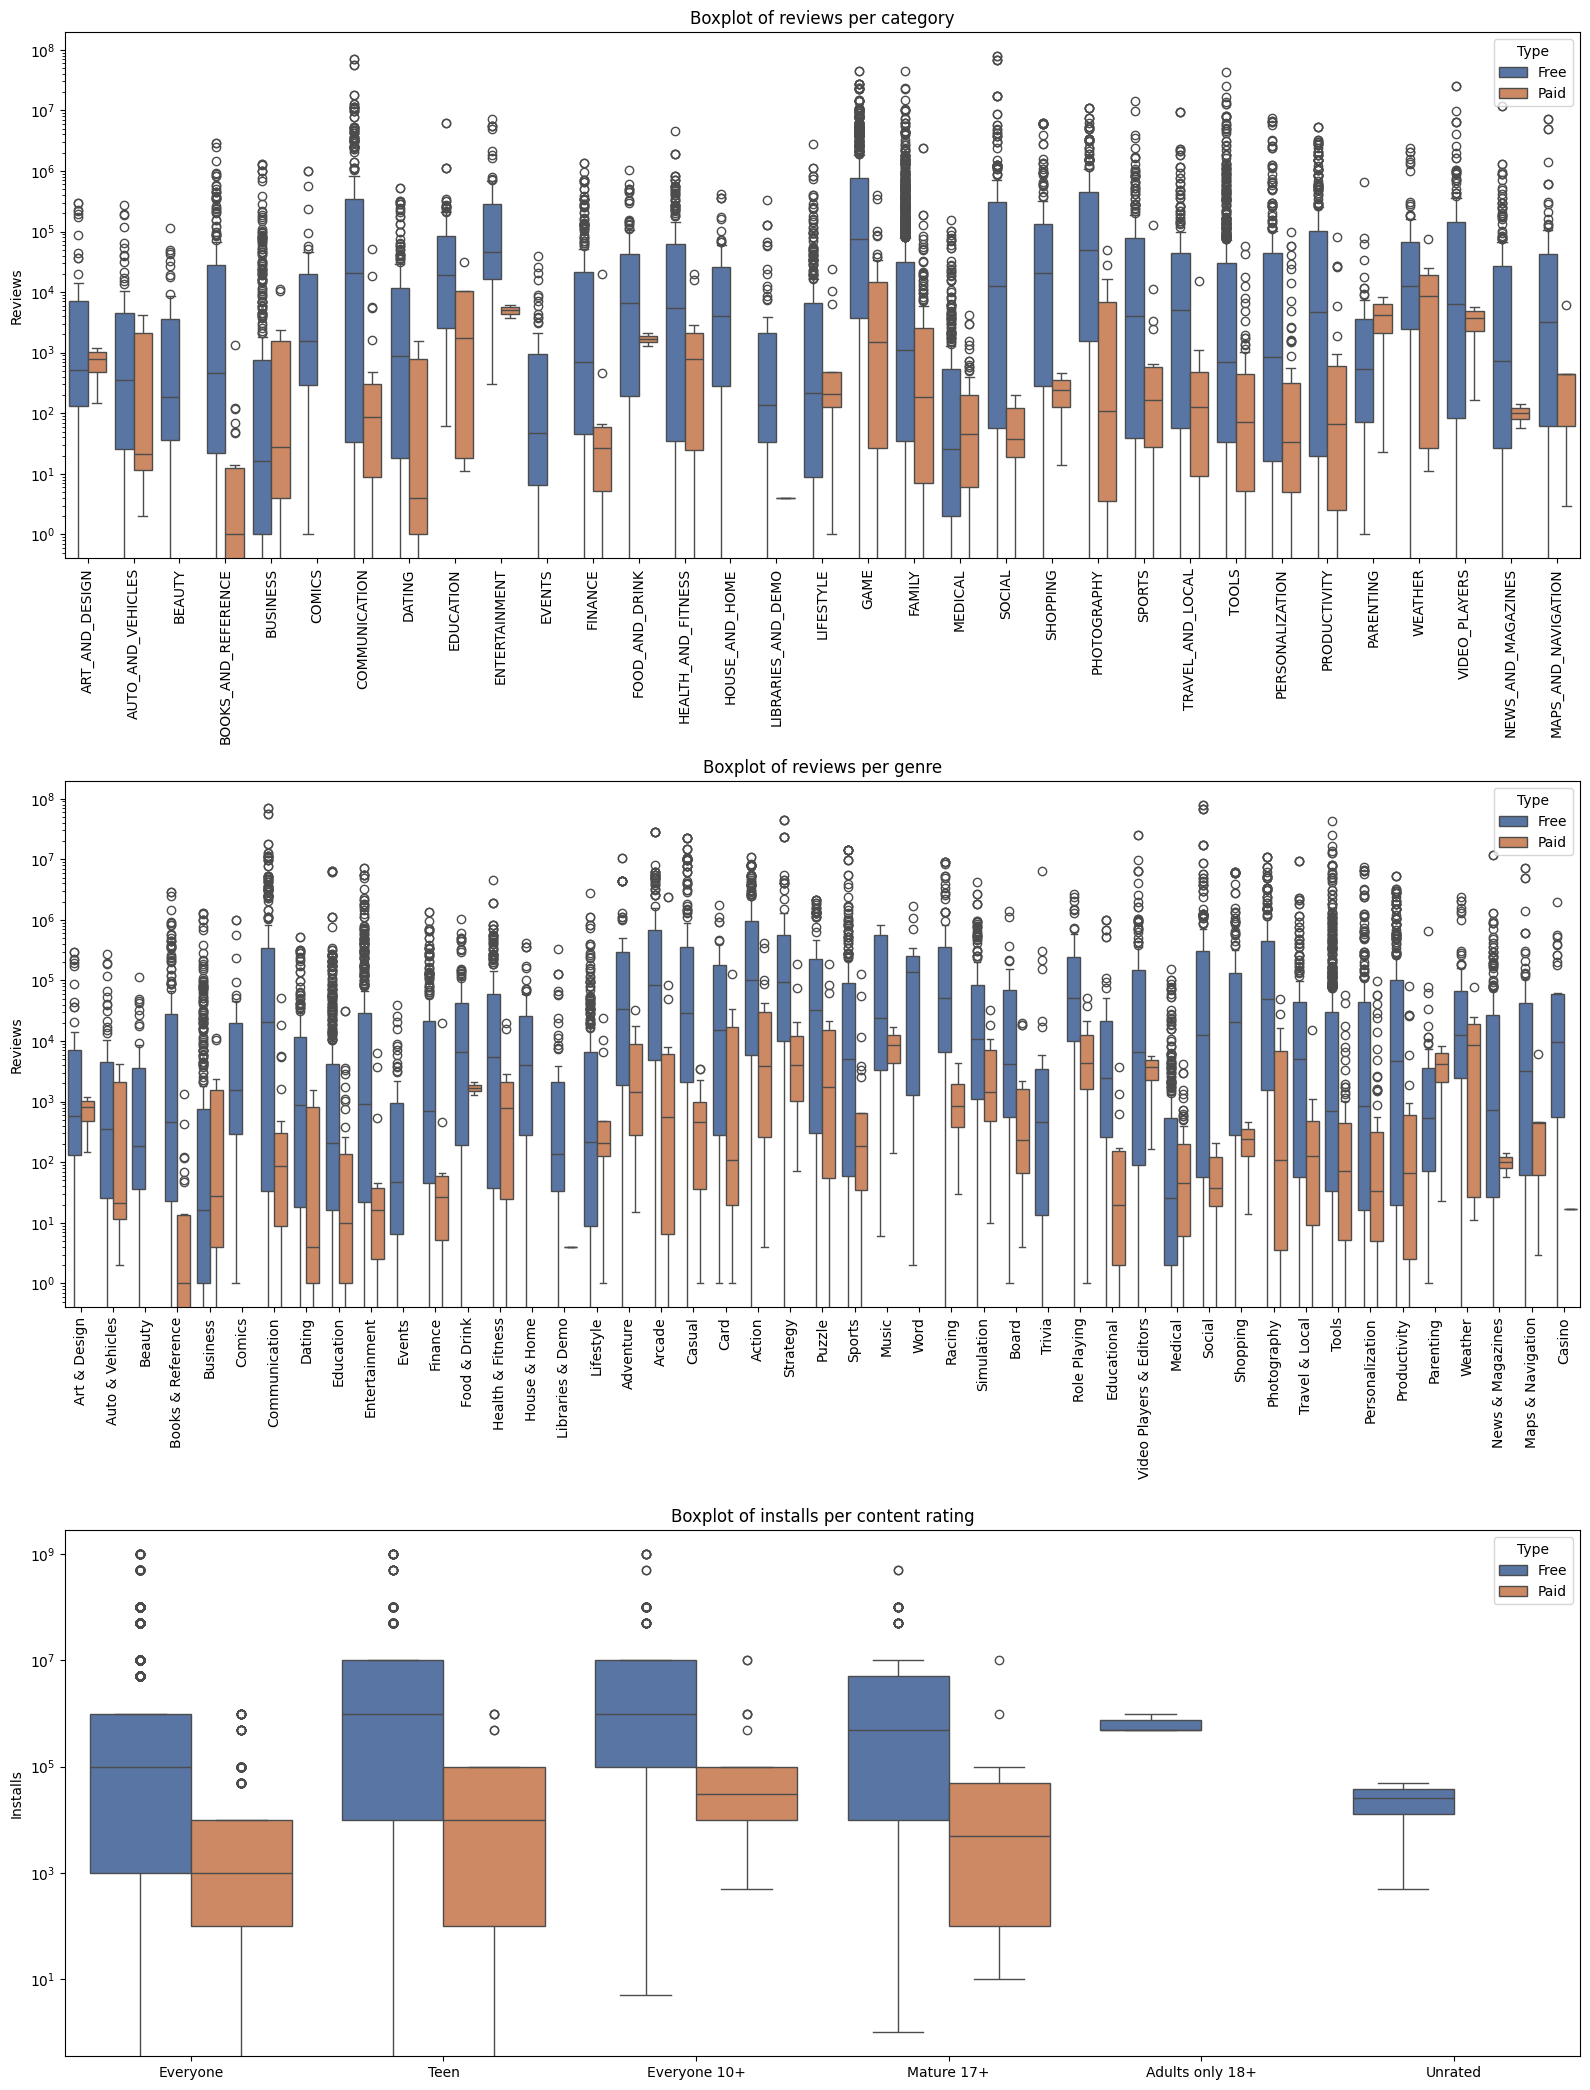

In [55]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 21)) #we create a figure with 3 rows, for 3 different boxplots
sns.boxplot(x='Category', y='Reviews', data=data, ax=ax[0], palette='deep', hue='Type', legend=True) #fist boxplot is reviews per category
ax[0].set_title('Boxplot of reviews per category')  
ax[0].set_yscale('log')
ax[0].set_xticks(ax[0].get_xticks());
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90); 
ax[0].set_xlabel('')
sns.boxplot(x='Genres', y='Reviews', data=data, ax=ax[1], palette='deep', hue='Type', legend=True) #second boxplot is reviews per genre
ax[1].set_title('Boxplot of reviews per genre')  
ax[1].set_yscale('log')  
ax[1].set_xticks(ax[1].get_xticks());
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90);
ax[1].set_xlabel('')
sns.boxplot(x='Content Rating', y='Installs', data=data, ax=ax[2], palette='deep', hue='Type', legend=True) #third boxplot is installs per content rating
ax[2].set_title('Boxplot of installs per content rating')  
ax[2].set_yscale('log')  
ax[2].set_xlabel('');
plt.tight_layout()

### From these graphs, we get an idea of the most popular apps present in the Google Play Store.
### -First of all, we notice how **Free** apps are far more popular than Paid apps.
### -The most popular categories are **Communication, Social, Tools, Game and Family**
### -The most popular genres are similar to the categories, with the addition of **Strategy, Adventure, Medical, Educational**, which most likely are Genres for the Game category
### - The most popular Content Rating is "Everyone"

### We can conclude that in order to develop a popular app, many variables should be taken into account, from its content rating to the price of the app. Although this analysis seems to be conclusive for itself, there are also other variables that a developer will take into account, such as the possibility to make the app "Freemium", or add in-game purchases, however these are outside the scope of this notebook.
### Therefore, from the data we have available, we can guess that a **Free strategy game** and a **Free educational or medical tool** would be two great shots at making a popular and highly rated app, given that it stays up to date!